In [2]:
!conda update conda -y
!conda install -c fastai fastai -y

!conda install nvidia-ml-py3 -y

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [3]:
from fastai.text import * 
from fastai import *

import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt

/home/ubuntu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
df = pd.read_csv('airline_tweets.csv')

In [5]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
bs = 64


data_lm = TextLMDataBunch.from_csv(path = '/home/ubuntu', csv_name = 'airline_tweets.csv', text_cols='text',
                                    valid_pct = 0.1, bs = bs)

data_clas = TextClasDataBunch.from_csv(path = '/home/ubuntu', csv_name = 'airline_tweets.csv', vocab=data_lm.train_ds.vocab, bs=bs,
                                      text_cols = 'text', label_cols = 'airline_sentiment')


In [19]:
# data_lm.save('data_lm_export.pkl')
# data_clas.save('data_clas_export.pkl')

# use export later to keep the same databunches
# use the same databunches to load weights of fine-tuned models

In [20]:
pwd

'/home/ubuntu'

In [21]:
data_lm = load_data('/home/ubuntu', 'data_lm_export.pkl', bs = bs)
data_clas = load_data('/home/ubuntu', 'data_clas_export.pkl', bs=bs)

In [22]:
data_lm.show_batch()

idx,text
0,free pretzels # xxunk xxbos @southwestair make this delay go away . xxmaj maybe upgrade me and xxmaj xxunk seats . xxmaj we are headed to xxmaj columbus . xxbos @united sister & & xxup xxunk stuck in xxmaj detroit desperately need to be in xxmaj florida flying w / @usairways is there anything you can do ? xxbos @southwestair are you kidding me ? i needed help yesterday .
1,xxunk at # xxup mco . xxmaj it 's an absolute disaster . xxbos @united ok it 's now been 7 months waiting to hear from airline . i gave them quite a bit more than the 30 days requested ! xxmaj terrible service xxbos @americanair when is next lax xxup jfk flight today xxbos @virginamerica they told to check with the airline regulation first so that is why i
2,transferred 3 times without resolving anything . xxmaj worst service ever . xxbos @united xxmaj the so below skilled staff and inadequate system just deleted my return from xxmaj houston to xxmaj xxunk . xxmaj shoulder xxunk is all you do .. xxbos @usairways 2 bad planes & & 3 gate xxunk lots of exercise . # xxunk let 's hope this plane works . i 'm tired . xxbos
3,"seats on plane . xxup no xxup more xxbos @americanair yes starting w / flight xxunk , getting me home more than 48 hours xxmaj late xxmaj flightr . record locator xxup xxunk xxbos @americanair xxmaj no apology necessary . xxmaj it was wind and i was on xxmaj delta . xxup xoxo xxbos @usairways i appreciate that you actually monitor xxmaj twitter , so please pass along my feedback"
4,"weather in ny is fine now . xxbos @americanair xxmaj these birds could fly to xxmaj south xxmaj america for example # xxmaj argentina xxbos @americanair xxmaj dallas / xxmaj fort xxmaj worth flight number xxunk xxbos @united i 'm checked in , agent would n't tag my bags at 7 am . xxmaj now i 'm standing in line hell . xxbos @southwestair i 've been on hold with"


In [23]:
data_clas.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup dub - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup dub 13 / 10 . i 'm * xxup g. xxmaj what is checked bag allowance for xxup jac - xxup lax ?,neutral
xxbos @southwestair xxmaj the xxmaj fact xxmaj that u xxmaj see xxmaj black xxmaj history xxmaj month 12 xxmaj months a xxmaj year xxmaj is xxmaj xxunk ! xxmaj we xxup will xxup be xxmaj an xxmaj xxunk xxmaj base xxmaj for xxmaj corp. xxmaj like u xxmaj in xxmaj future !,positive
xxbos @americanair xxmaj hi . i have xxup koa - xxup lax - xxup phl - xxup ord booked as a 1-way xxunk xxunk . xxmaj if i called to chnge it to xxup koa - xxup lax - xxup phx - xxup ord would i have to pay any fees,neutral
xxbos @virginamerica xxmaj many xxmaj thanks for the xxmaj follow . \n # ourprincess # freyasfund # xxup usa # xxmaj xxunk \n xxmaj looking for xxmaj any xxmaj help 😍 \n 💗 🇬 🇧 💗 🇺 🇸 💗 \n 🎀 🌏 🎀 http : / / t.co / xxunk,neutral
"xxbos @usairways e xxrep 4 y ! xxmaj cancelled xxmaj flightlations , xxmaj flight xxmaj booking xxmaj problemss , reflight xxmaj booking xxmaj problemss , but y' all got me on the same flight out tonight ( not tomorrow ) & & the xxup fc upgrade . xxmaj thx !",positive


In [14]:
# learn = language_model_learner(data_lm, arch = Transformer, drop_mult=0.5)
learn = language_model_learner(data_lm, arch = AWD_LSTM, drop_mult=0.5)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


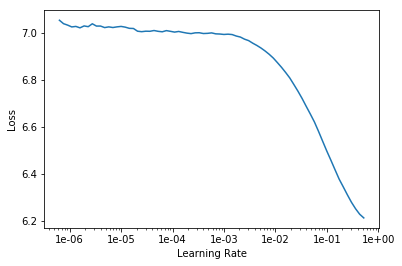

In [40]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

epoch,train_loss,valid_loss,accuracy,time
0,4.847753,4.220895,0.234766,06:09


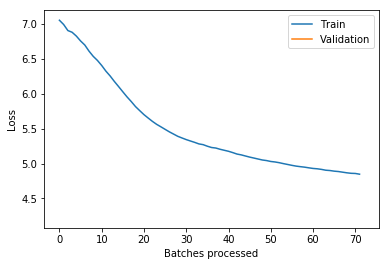

In [16]:
# learn.fit_one_cycle(1, 3e-3, moms=(0.8,0.7))
learn.fit_one_cycle(1, 1e-1)
learn.recorder.plot_losses()


In [42]:
learn.save('lm_stage_1', return_path = True)

PosixPath('/home/ubuntu/models/lm_stage_1.pth')

In [ ]:
# learn.load('lm_stage_1')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-1, moms=(0.8,0.7))
# learn.fit(10, 1e-1)

learn.recorder.plot_losses()

In [34]:
learn.save('lm_fine_tuned', return_path = True)

In [ ]:
# learn.load('lm_fine_tuned')

# Saving Encoder for classification

In [ ]:
learn.save_encoder('fine_tuned_enc')


In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [ ]:
learn.lr_find()
learn.recorder.plot()


In [ ]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))


In [ ]:
learn.save('clas_stage1')


In [ ]:
learn.load('clas_stage1')


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [ ]:
learn.save('clas_stage2')